<a href="https://colab.research.google.com/github/muhammadibrohimov-ai/Regression/blob/main/Sklearn_Simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


In [4]:
housing = df[df['district'] == "Чиланзарский"]
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [20]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.10, random_state=42)

In [21]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

X_train = np.asanyarray(train_set[['size']])
Y_train = np.asanyarray(train_set[['price']])

# educating model
LR_model.fit(X_train, Y_train)

theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]

print(theta1, theta0)

732.7784051414766 106.31843170110369


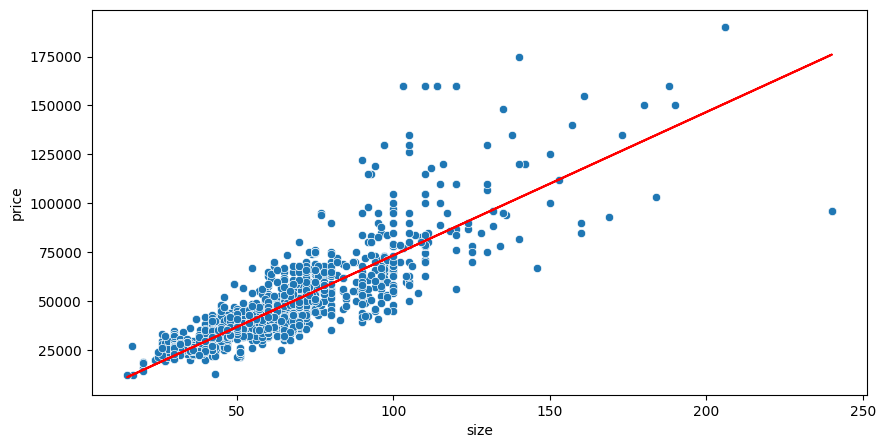

In [33]:
plt.figure(figsize = (10, 5))
sns.scatterplot(data = housing, x = 'size', y = 'price')
plt.plot(X_train, theta0 + theta1 * X_train, '-r')
plt.show()

In [36]:
X_test = np.asanyarray(test_set[['size']])
Y_test = np.asanyarray(test_set[['price']])

In [38]:
Y_predicted = LR_model.predict(X_test)

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae, rmse = mean_absolute_error(Y_test, Y_predicted), np.sqrt(mean_squared_error(Y_test, Y_predicted))
print(f'MAE : {mae}\nRMSE : {rmse}')

MAE : 7269.709648262382
RMSE : 12734.803748258666
